In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mineda/datasets/main/heroes_information.csv'
heroes = pd.read_csv(url, sep = ',')
heroes.head(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [ ]:
heroes.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [ ]:
url2 = 'https://raw.githubusercontent.com/mineda/datasets/main/super_hero_powers.csv'
heroes_powers = pd.read_csv(url2, sep = ',')
heroes_powers.head(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
heroes_powers.dtypes

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 168, dtype: object

In [ ]:
heroes_merge = heroes.merge(heroes_powers, left_on='name', right_on='hero_names')
heroes_merge.head(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,False
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
heroes_clean = heroes_merge.drop(['Unnamed: 0', 'name', 'hero_names'], axis=1)
heroes_clean.replace('-', 'Unknown', inplace=True)
heroes_clean.replace(True, 1, inplace=True)
heroes_clean.replace(False, 0, inplace=True)
heroes_clean['Publisher'] = heroes_clean['Publisher'].fillna('Other')
heroes_clean.head(5)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,...,0,0,0,0,0,0,0,0,0,0
2,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,Unknown,bad,-99.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
heroes_clean.dtypes

Gender                    object
Eye color                 object
Race                      object
Hair color                object
Height                   float64
                          ...   
Phoenix Force              int64
Molecular Dissipation      int64
Vision - Cryo              int64
Omnipresent                int64
Omniscient                 int64
Length: 176, dtype: object

In [ ]:
X = heroes_clean.drop(['Alignment'], axis=1)
y = heroes_clean['Alignment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Verifica se existem valores nulos
print(heroes_clean.isnull().sum())

Gender                   0
Eye color                0
Race                     0
Hair color               0
Height                   0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 176, dtype: int64


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(X.dtypes != float)[0]

print(categorical_features_indices)

[  0   1   2   3   5   6   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174]


In [ ]:
model = CatBoostClassifier(
    custom_loss=[metrics.Precision()],
    random_seed=42,
    logging_level='Silent'
)

model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Acurácia: 0.64
Precision: 0.61
Matriz de Confusão


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


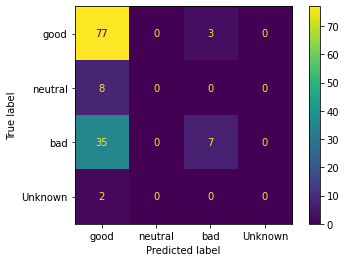

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()

In [ ]:
# One Hot
X_one_hot = X.copy()
for attribute in X_one_hot.columns:
    if X_one_hot[attribute].dtype == object:
        vocabulary = X_one_hot[attribute].unique()
        if len(vocabulary) > 1:
            X_one_hot = pd.concat([X_one_hot,pd.get_dummies(X_one_hot[attribute], prefix=attribute)],axis=1)
        X_one_hot.drop([attribute],axis=1, inplace=True)

In [ ]:
X_one_hot

,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Skin color_grey,Skin color_orange,Skin color_orange / white,Skin color_pink,Skin color_purple,Skin color_red,Skin color_red / black,Skin color_silver,Skin color_white,Skin color_yellow
0,203.0,441.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,191.0,65.0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,185.0,90.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,203.0,441.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-99.0,-99.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,165.0,52.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
656,304.8,-99.0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
657,66.0,17.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
658,170.0,57.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Verifica valores nulos
for attribute in X_one_hot:
    null_values = X_one_hot[attribute].isnull().sum()
    if null_values > 0:
        print(attribute + ': ' + str(null_values)) 

Weight: 2


In [ ]:
# Trata valor nul
X_one_hot['Weight'] = X_one_hot['Weight'].fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo árvore de decisão com profundidade máxima 6
model = MLPClassifier(random_state=1, max_iter=2000)

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

Acurácia: 0.64
Precision: 0.65
Matriz de Confusão


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


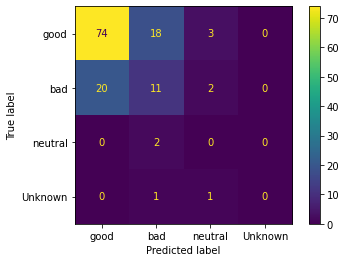

In [ ]:
# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo árvore de decisão com profundidade máxima 6
model = MLPClassifier(random_state=1, max_iter=2000, early_stopping=True)

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, max_iter=2000, random_state=1)

Acurácia: 0.73
Precision: 0.70
Matriz de Confusão


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


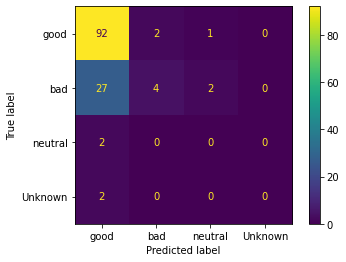

In [ ]:
# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()